Processing file: /kaggle/input/color/Tomato___Late_blight/c4f45383-715a-48b2-8ec7-c45d1c230a9d___GHLB_PS Leaf 13.1 Day 7.jpg
Processing file: /kaggle/input/color/Tomato___Late_blight/d2ef0edd-4a4f-4245-85a8-34309ef9ef71___GHLB_PS Leaf 46.1 Day 18.jpg
Processing file: /kaggle/input/color/Tomato___Late_blight/121097dd-b0cb-436b-9b2f-7dab30c86872___GHLB_PS Leaf 37.1 Day 13.jpg
Processing file: /kaggle/input/color/Tomato___Late_blight/f843c76c-a7d4-4031-abe2-9245602fbb15___GHLB_PS Leaf 49.1 Day 18.jpg
Processing file: /kaggle/input/color/Tomato___Late_blight/a6876e29-dc0f-4716-bd3c-eedc9f45cf70___GHLB_PS Leaf 41 Day 18.jpg
Processing file: /kaggle/input/color/Tomato___Late_blight/6b7f4762-88d6-4e85-8fad-57ca4083ec89___GHLB_PS Leaf 8.1 Day 9.jpg
Processing file: /kaggle/input/color/Tomato___Late_blight/d82b634e-9a19-497b-b698-aaf100d622a1___GHLB_PS Leaf 24 Day 13.jpg
Processing file: /kaggle/input/color/Tomato___Late_blight/6c0403af-46da-424a-bb2e-98610e1b11b1___GHLB_PS Leaf 38 Day 16.jpg
P

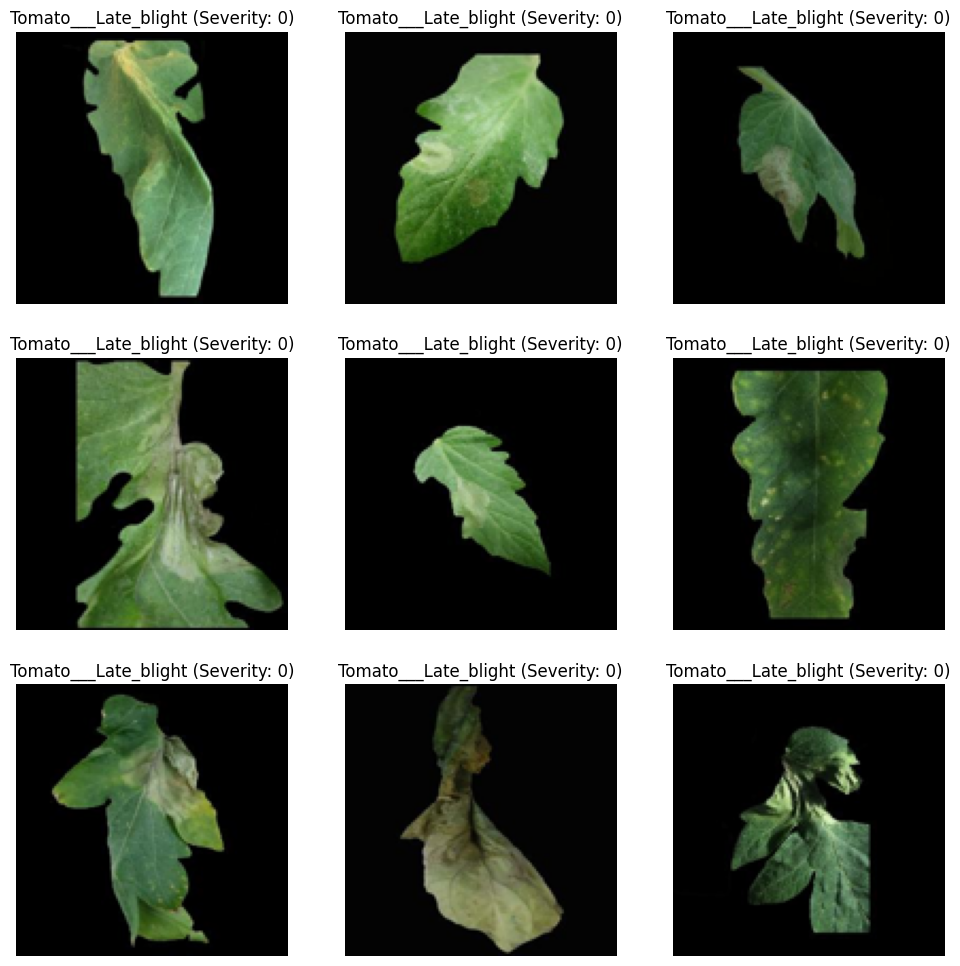

Preprocessing complete. Class names saved to class_names.csv.
Images, labels, and severities saved to images.npy, labels.npy, and severities.npy.


In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import re

# Define the path to the dataset
dataset_path = '/kaggle/input/color'  # Replace with the actual path

# Set image size
IMG_HEIGHT, IMG_WIDTH = 128, 128

# Function to load images, labels, and severities
def load_images_labels_severity(dataset_path):
    images = []
    labels = []
    severities = []
    class_names = set()  # Use set to avoid duplicates

    for root, dirs, files in os.walk(dataset_path):
        for name in dirs:
            class_names.add(re.sub(r'___\d+$', '', name))  # Extract class name without severity
        for name in files:
            if name.endswith(".jpg") or name.endswith(".png"):
                label = os.path.basename(root)
                img_path = os.path.join(root, name)
                print(f"Processing file: {img_path}")  # Debugging statement
                try:
                    img = Image.open(img_path).convert('RGB')  # Ensure image is in RGB format
                    img = img.resize((IMG_HEIGHT, IMG_WIDTH))
                    images.append(np.array(img))
                    labels.append(re.sub(r'___\d+$', '', label))  # Remove severity from label
                    severity_match = re.search(r'___(\d+)$', label)
                    if severity_match:
                        severities.append(int(severity_match.group(1)))
                    else:
                        severities.append(0)  # Default severity if not found
                except Exception as e:
                    print(f"Error processing file {img_path}: {e}")

    # Convert lists to NumPy arrays
    images = np.array(images)
    labels = np.array(labels)
    severities = np.array(severities)

    return images, labels, severities, list(class_names)

# Load data
images, labels, severities, class_names = load_images_labels_severity(dataset_path)

print(f"Number of images loaded: {len(images)}")  # Debugging statement
print(f"Class names: {class_names}")  # Debugging statement

# Display some images, their labels, and severities
def display_sample_images(images, labels, severities, class_names):
    if len(images) == 0:
        print("No images to display.")  # Debugging statement
        return
    
    plt.figure(figsize=(12, 12))
    for i in range(min(9, len(images))):  # Ensure we don't go out of bounds
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f"{labels[i]} (Severity: {severities[i]})")
        plt.axis('off')
    plt.show()

display_sample_images(images, labels, severities, class_names)

# Convert labels to numerical values
label_to_index = {label: index for index, label in enumerate(class_names)}
index_to_label = {index: label for label, index in label_to_index.items()}
numeric_labels = np.array([label_to_index[label] for label in labels])

# Save class names to a CSV file
class_names_df = pd.DataFrame(class_names, columns=['Class Name'])
class_names_df.to_csv('class_names.csv', index=False)

# Save images, labels, and severities to files
np.save('images.npy', images)
np.save('labels.npy', numeric_labels)
np.save('severities.npy', severities)
print('Preprocessing complete. Class names saved to class_names.csv.')
print('Images, labels, and severities saved to images.npy, labels.npy, and severities.npy.')

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split 



In [8]:
X = images
y = numeric_labels  
X = X / 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)

In [10]:

import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), 
                                 strides = (1,1), padding='same', name='conv_1',
           activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), name='pool_1'))

model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3),
                                 strides=(1,1), padding='same', name='conv_2',
           activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), name='pool_2'))

model.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3),
                                 strides=(1,1), padding='same', name='conv_3',
           activation='relu'))



In [11]:
model.add(tf.keras.layers.Flatten())

In [12]:
model.add(tf.keras.layers.Dense(units = 512, name='fc_1', activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units = 256, name='fc_2', activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

# The number of units here shall be equal to the number of classes
model.add(tf.keras.layers.Dense(units = 38, name='fc_3', activation='softmax'))

In [13]:
tf.random.set_seed(1)
model.build(input_shape=(None, 128, 128, 3))
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [14]:
history = model.fit(train_generator, epochs=15, validation_data=(X_test, y_test) , shuffle=True)

Epoch 1/15


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.6706 - loss: 1.8538 - val_accuracy: 0.7674 - val_loss: 9.5946
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.7581 - loss: 0.9687 - val_accuracy: 0.7674 - val_loss: 12.7374
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.7477 - loss: 0.9248 - val_accuracy: 0.7674 - val_loss: 51.1106
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.7512 - loss: 0.9033 - val_accuracy: 0.7674 - val_loss: 98.3019
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.8314 - loss: 0.6765 - val_accuracy: 0.7674 - val_loss: 145.3990
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.8635 - loss: 0.5806 - val_accuracy: 0.7674 - val_loss: 139.4469
Epoch 7/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.8389 - loss: 0.6136 - val_accuracy: 0.7674 - val_loss: 206.5315
Epoch 8/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.8454 - loss: 0.5899 - val_accuracy: 0.7674 - val_loss: 1

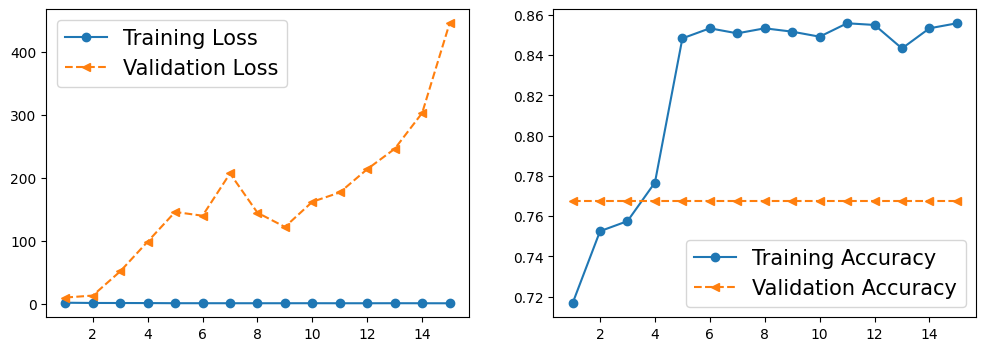

In [15]:
import matplotlib.pyplot as plt
import numpy as np
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,2,1)
ax.plot(x_arr, hist['loss'], '-o',label='Training Loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation Loss')
ax.legend(fontsize=15)
ax = fig.add_subplot(1,2,2)
ax.plot(x_arr, hist['accuracy'], '-o',label='Training Accuracy')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation Accuracy')
ax.legend(fontsize=15)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


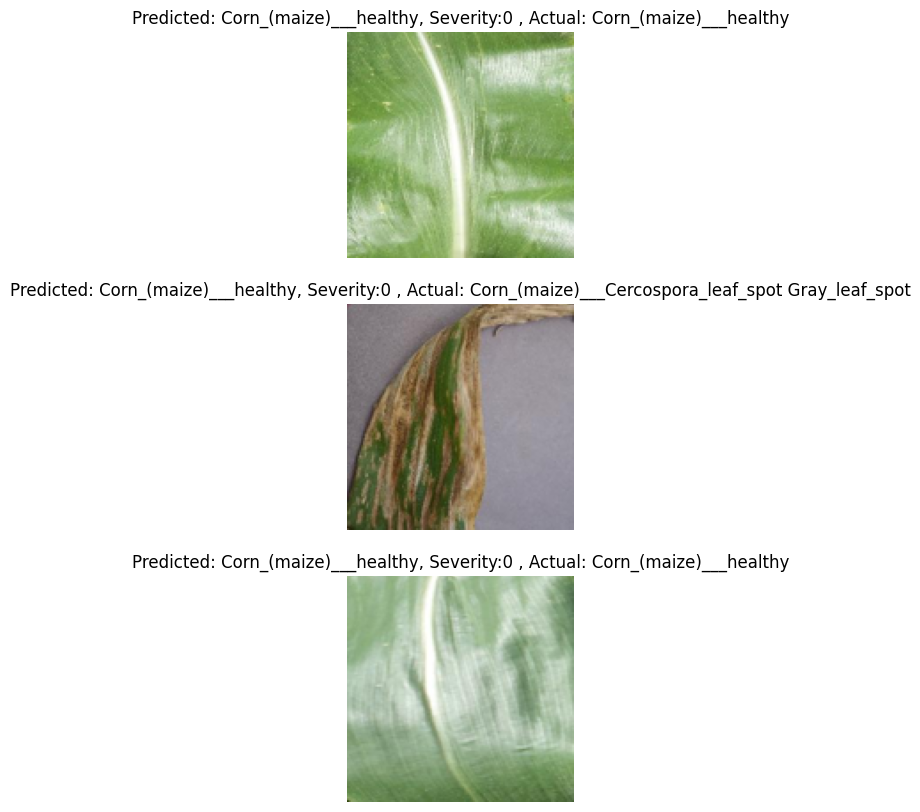

In [16]:
num_images_to_display =3
random_indices = np.random.choice(len(X_test), num_images_to_display, replace=False)

predictions = model.predict(X_test[random_indices])
predicted_classes = np.argmax(predictions, axis=1)
plt.figure(figsize=(15, 10))
for i, index in enumerate(random_indices):
    plt.subplot(3, 1, i + 1)
    plt.imshow(X_test[index])
    plt.title(f"Predicted: {class_names[predicted_classes[i]]}, Severity:{severities[index]} , Actual: {class_names[y_test[index]]}")
    plt.axis('off')
plt.show()

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support, ConfusionMatrixDisplay, PrecisionRecallDisplay
import seaborn as sns




In [20]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step


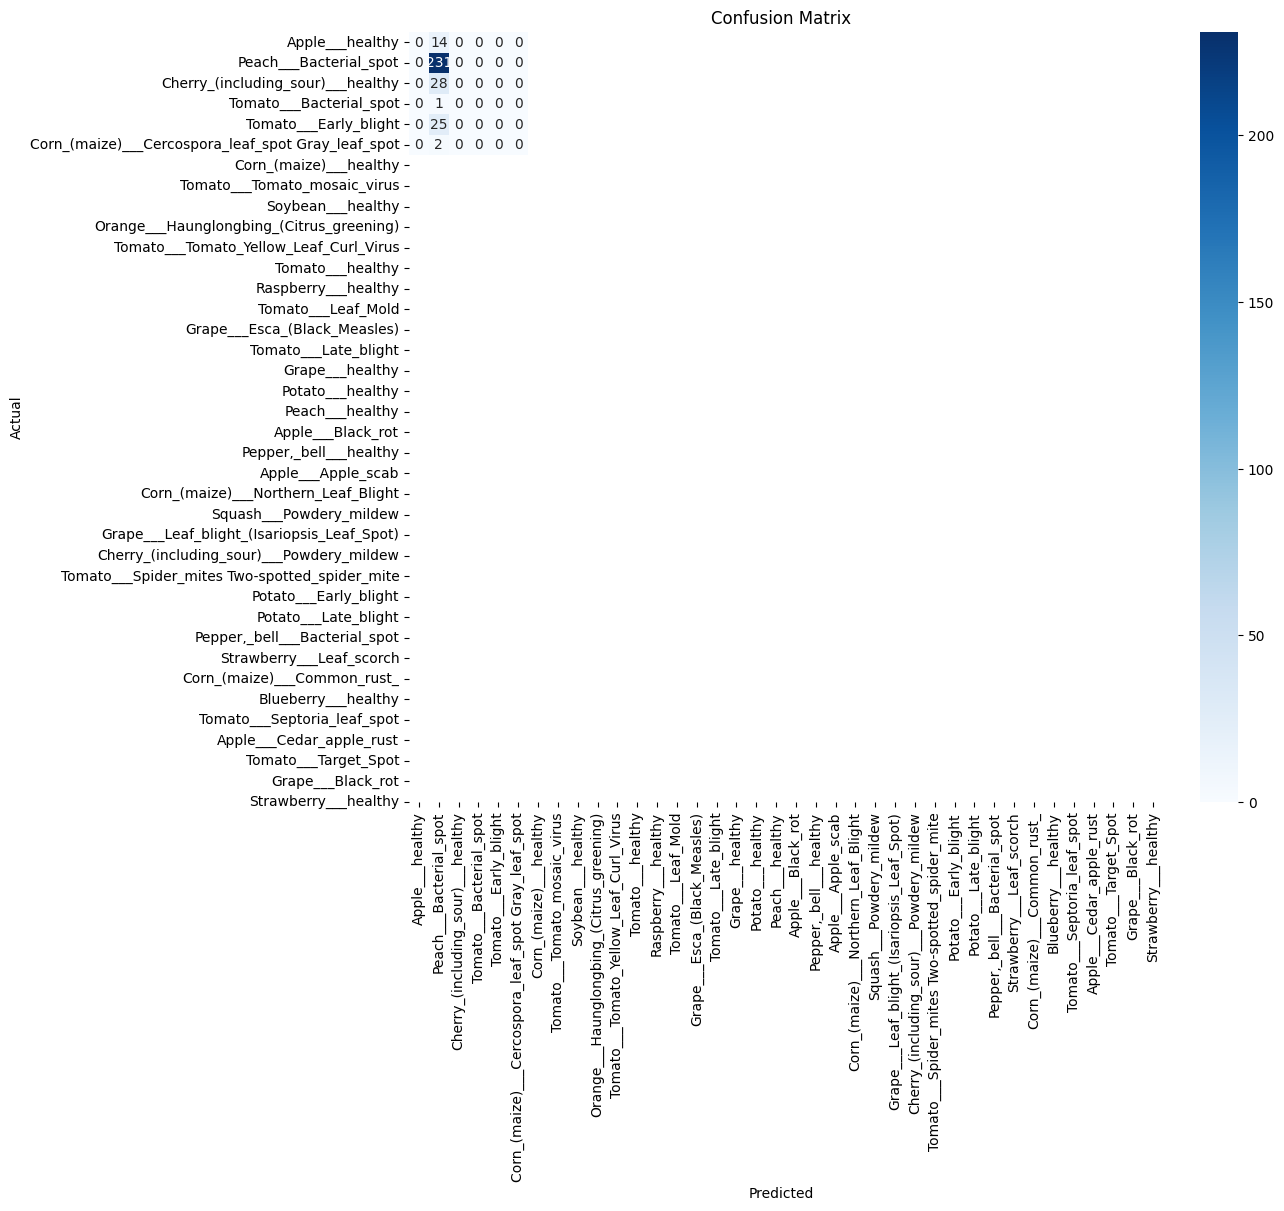

In [27]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all t

Precision: 0.5890
Recall: 0.7674
F1 Score: 0.6665


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class f

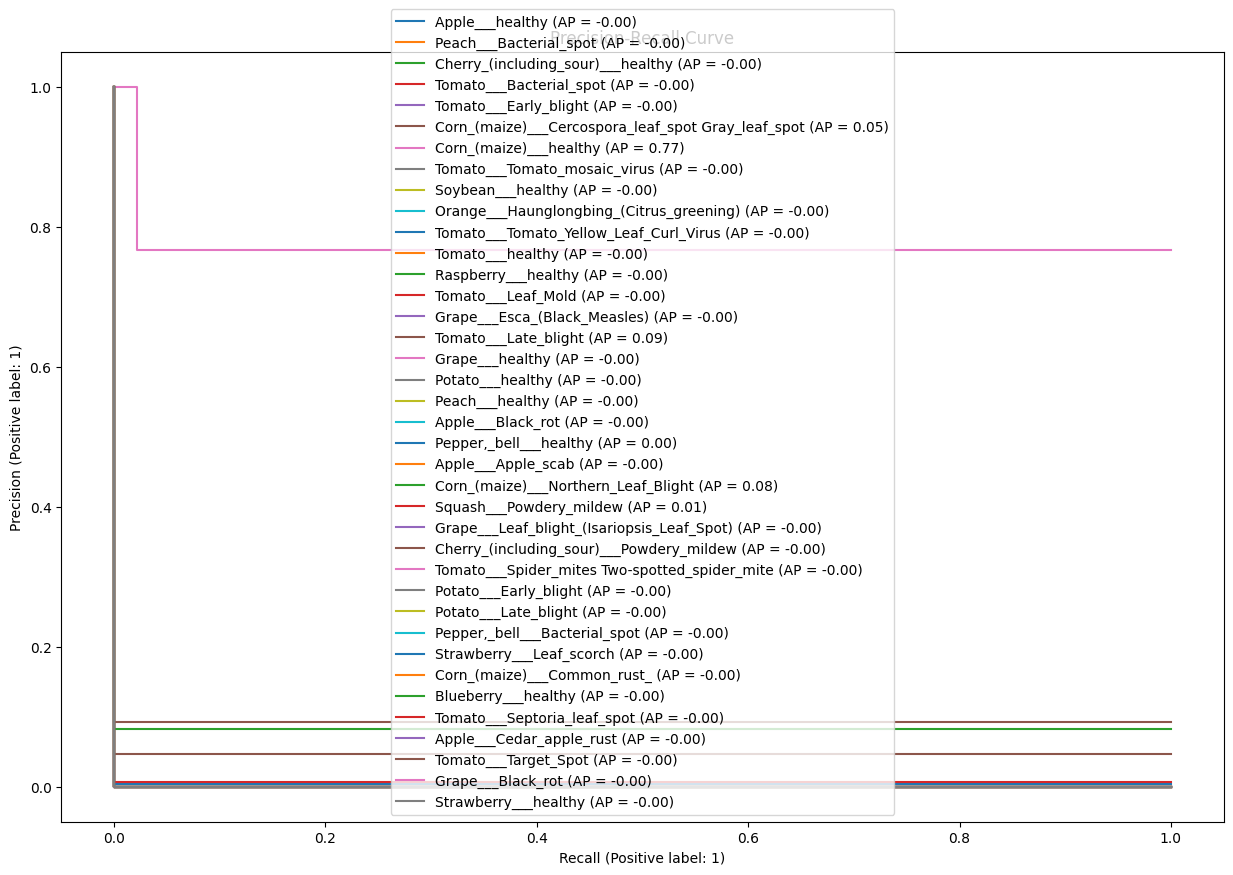

In [26]:
# Precision, recall, F1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_classes, average='weighted')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

plt.figure(figsize=(15, 10))
for i, class_name in enumerate(class_names):
    PrecisionRecallDisplay.from_predictions(y_test == i, y_pred[:, i], name=class_name, ax=plt.gca())
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()